<a href="https://colab.research.google.com/github/gabrielmenezes4/covid19-tatui/blob/master/Covid_tracker_Tatui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing libraries:
import numpy as np 
import pandas as pd # 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import matplotlib.cbook as cbook 
from datetime import datetime 
print('Libraries successfully loaded')

Libraries successfully loaded


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Importing data from Secretaria de Saúde do Governo do Estado de São Paulo:
df_dataset = pd.read_csv( 'https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv', sep=';', index_col=None) 

print('Data successfully loaded')

Data successfully loaded


In [4]:
display(df_dataset.head(n=10))

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
5,Águas de Santa Bárbara,3500550,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",RA de Sorocaba,13,Bauru,12,5931,1106,40446,0,8.0,"-22,8812","-49,2421",9
6,Águas de São Pedro,3500600,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",RA de Campinas,4,Piracicaba,11,3122,764,361,0,8.0,"-22,5977","-47,8734",9
7,Agudos,3500709,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",RA de Bauru,3,Bauru,12,36134,5524,96671,0,8.0,"-22,4694","-48,9863",9
8,Alambari,3500758,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",RA de Sorocaba,13,Sorocaba,6,5779,830,1596,0,8.0,"-23,5503","-47,8980",9
9,Alfredo Marcondes,3500808,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",RA de Presidente Prudente,9,Presidente Prudente,2,3927,907,11892,0,8.0,"-21,9527","-51,4140",9


In [5]:
df_dataset.tail(n=10)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
120146,Ignorado,9999999,19,8,2020-08-19,170,-2,"0,000000e+00","-1,7142857",15,2,"0,000000e+00","0,4285714","0,088235294",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",34
120147,Ignorado,9999999,20,8,2020-08-20,180,10,"0,000000e+00","1,4285714",17,2,"0,000000e+00","0,2857143","0,094444444",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",34
120148,Ignorado,9999999,21,8,2020-08-21,163,-17,"0,000000e+00","-0,7142857",17,0,"0,000000e+00","-0,5714286","0,104294479",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",34
120149,Ignorado,9999999,22,8,2020-08-22,200,37,"0,000000e+00","-5,1428571",10,-7,"0,000000e+00","-2,2857143","0,050000000",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",34
120150,Ignorado,9999999,23,8,2020-08-23,218,18,"0,000000e+00","7,1428571",9,-1,"0,000000e+00","-1,2857143","0,041284404",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",35
120151,Ignorado,9999999,24,8,2020-08-24,194,-24,"0,000000e+00","1,5714286",8,-1,"0,000000e+00","-0,8571429","0,041237113",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",35
120152,Ignorado,9999999,25,8,2020-08-25,177,-17,"0,000000e+00","0,7142857",17,9,"0,000000e+00","0,5714286","0,096045198",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",35
120153,Ignorado,9999999,26,8,2020-08-26,183,6,"0,000000e+00","1,8571429",7,-10,"0,000000e+00","-1,1428571","0,038251366",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",35
120154,Ignorado,9999999,27,8,2020-08-27,158,-25,"0,000000e+00","-3,1428571",7,0,"0,000000e+00","-1,4285714","0,044303797",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",35
120155,Ignorado,9999999,28,8,2020-08-28,156,-2,"0,000000e+00","-1,0000000",0,-7,"0,000000e+00","-2,4285714","0,000000000",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",35


In [6]:
df_dataset.shape

(120156, 26)

In [7]:
# Remove unused columns:
df_dataset = df_dataset.drop(columns=['codigo_ibge','nome_ra','cod_ra','nome_drs','cod_drs','area','map_leg','map_leg_s','latitude','longitude'])
display(df_dataset.head(n=10))

,nome_munic,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,semana_epidem
0,Adamantina,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",33894,7398,9
1,Adolfo,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",3447,761,9
2,Aguaí,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",35608,5245,9
3,Águas da Prata,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",7797,1729,9
4,Águas de Lindóia,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",18374,3275,9
5,Águas de Santa Bárbara,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",5931,1106,9
6,Águas de São Pedro,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",3122,764,9
7,Agudos,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",36134,5524,9
8,Alambari,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",5779,830,9
9,Alfredo Marcondes,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",3927,907,9


In [8]:
# Retrieving data regarding "Tatuí":
tatui_data = df_dataset.loc[df_dataset['nome_munic']=='Tatuí', :]

display(tatui_data.head(n=10))

,nome_munic,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,semana_epidem
603,Tatuí,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",120123,17470,9
1248,Tatuí,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",120123,17470,9
1893,Tatuí,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",120123,17470,9
2538,Tatuí,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",120123,17470,9
3183,Tatuí,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",120123,17470,9
3828,Tatuí,1,3,2020-03-01,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",120123,17470,10
4473,Tatuí,2,3,2020-03-02,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",120123,17470,10
5118,Tatuí,3,3,2020-03-03,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",120123,17470,10
5763,Tatuí,4,3,2020-03-04,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",120123,17470,10
6408,Tatuí,5,3,2020-03-05,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,000000000",120123,17470,10


In [9]:
display(tatui_data.tail(n=10))

,nome_munic,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,pop,pop_60,semana_epidem
114123,Tatuí,19,8,2020-08-19,1422,29,"1,183787e+03","30,2857143",50,2,"4,162400e+01","1,5714286","0,035161744",120123,17470,34
114768,Tatuí,20,8,2020-08-20,1446,24,"1,203766e+03","26,5714286",50,0,"4,162400e+01","1,2857143","0,034578147",120123,17470,34
115413,Tatuí,21,8,2020-08-21,1449,3,"1,206264e+03","20,0000000",50,0,"4,162400e+01","1,0000000","0,034506556",120123,17470,34
116058,Tatuí,22,8,2020-08-22,1501,52,"1,249553e+03","20,1428571",52,2,"4,328896e+01","1,2857143","0,034643571",120123,17470,34
116703,Tatuí,23,8,2020-08-23,1505,4,"1,252882e+03","20,5714286",52,0,"4,328896e+01","1,2857143","0,034551495",120123,17470,35
117348,Tatuí,24,8,2020-08-24,1512,7,"1,258710e+03","21,0000000",52,0,"4,328896e+01","1,2857143","0,034391534",120123,17470,35
117993,Tatuí,25,8,2020-08-25,1547,35,"1,287847e+03","22,0000000",52,0,"4,328896e+01","0,5714286","0,033613445",120123,17470,35
118638,Tatuí,26,8,2020-08-26,1586,39,"1,320313e+03","23,4285714",52,0,"4,328896e+01","0,2857143","0,032786885",120123,17470,35
119283,Tatuí,27,8,2020-08-27,1620,34,"1,348618e+03","24,8571429",52,0,"4,328896e+01","0,2857143","0,032098765",120123,17470,35
119928,Tatuí,28,8,2020-08-28,1640,20,"1,365267e+03","27,2857143",52,0,"4,328896e+01","0,2857143","0,031707317",120123,17470,35


In [10]:
# Computing moving averages for "obitos_novos" e "casos_novos":
tatui_data['pandas_SMA_obitos_novos'] = tatui_data.loc[:,'obitos_novos'].rolling(window=14).mean()
tatui_data['pandas_SMA_casos_novos'] = pd.to_numeric(tatui_data['casos_novos'],errors='coerce').rolling(window=14).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


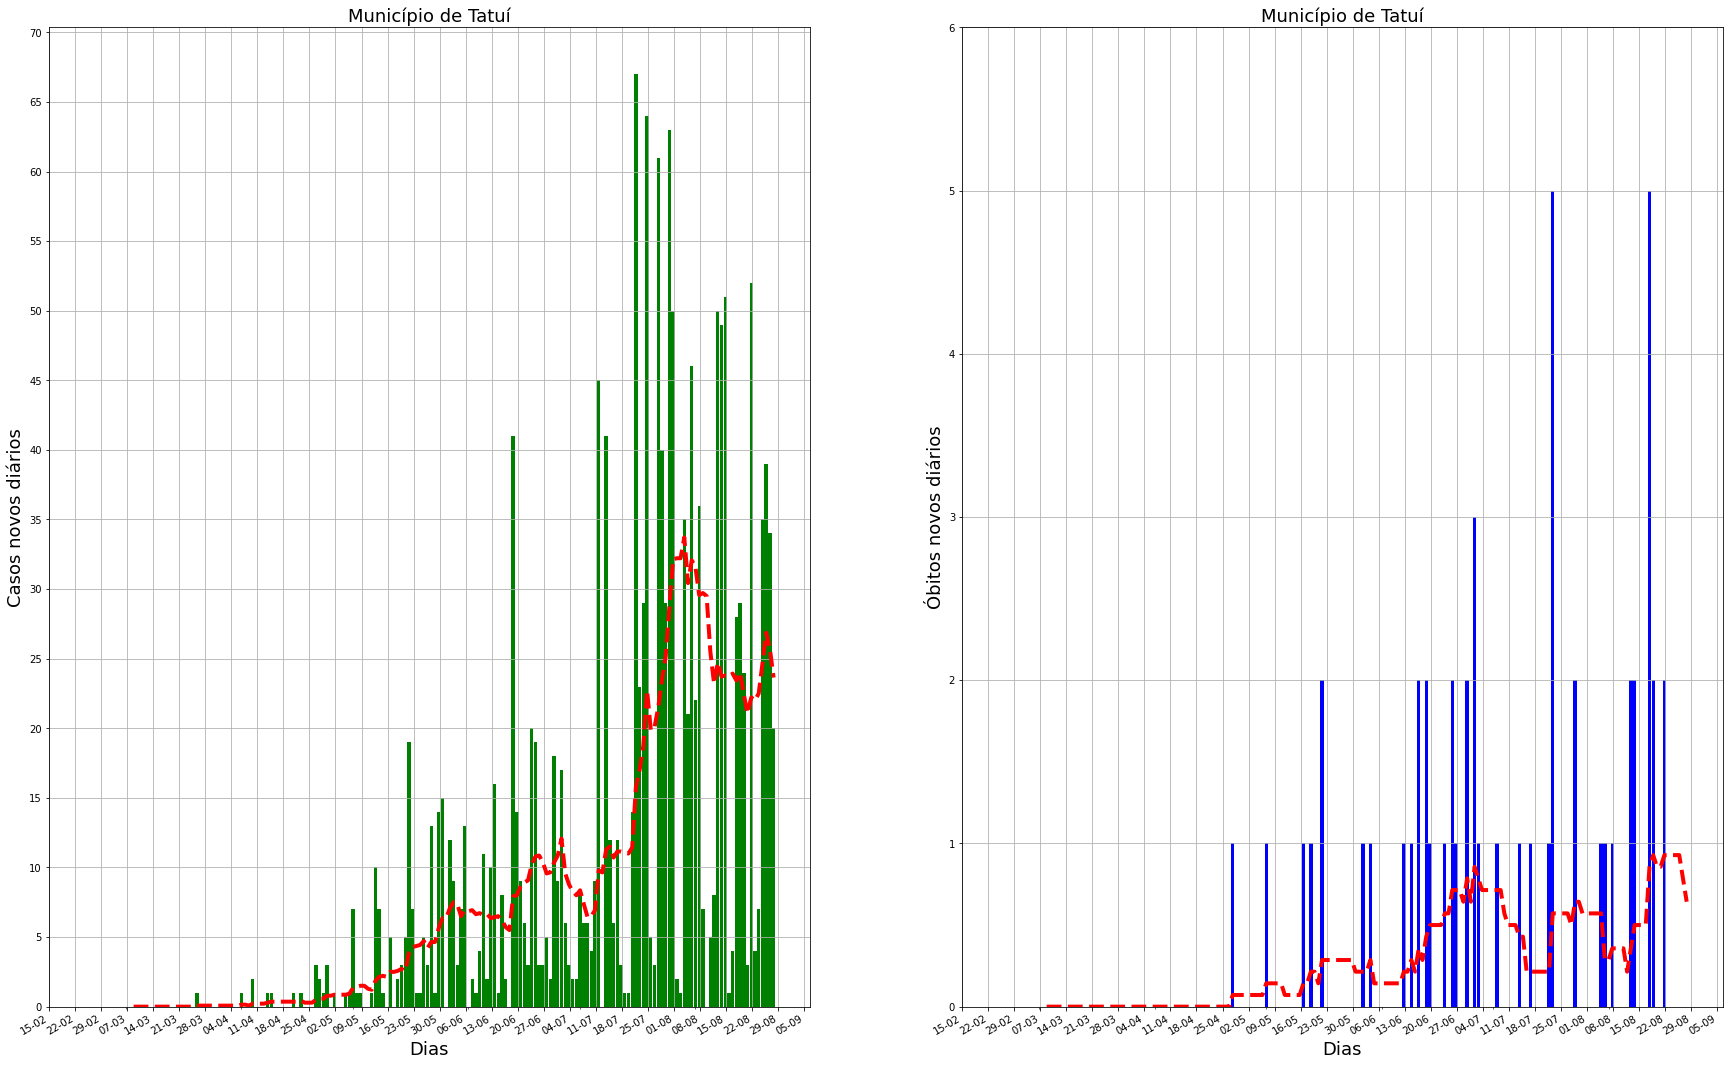

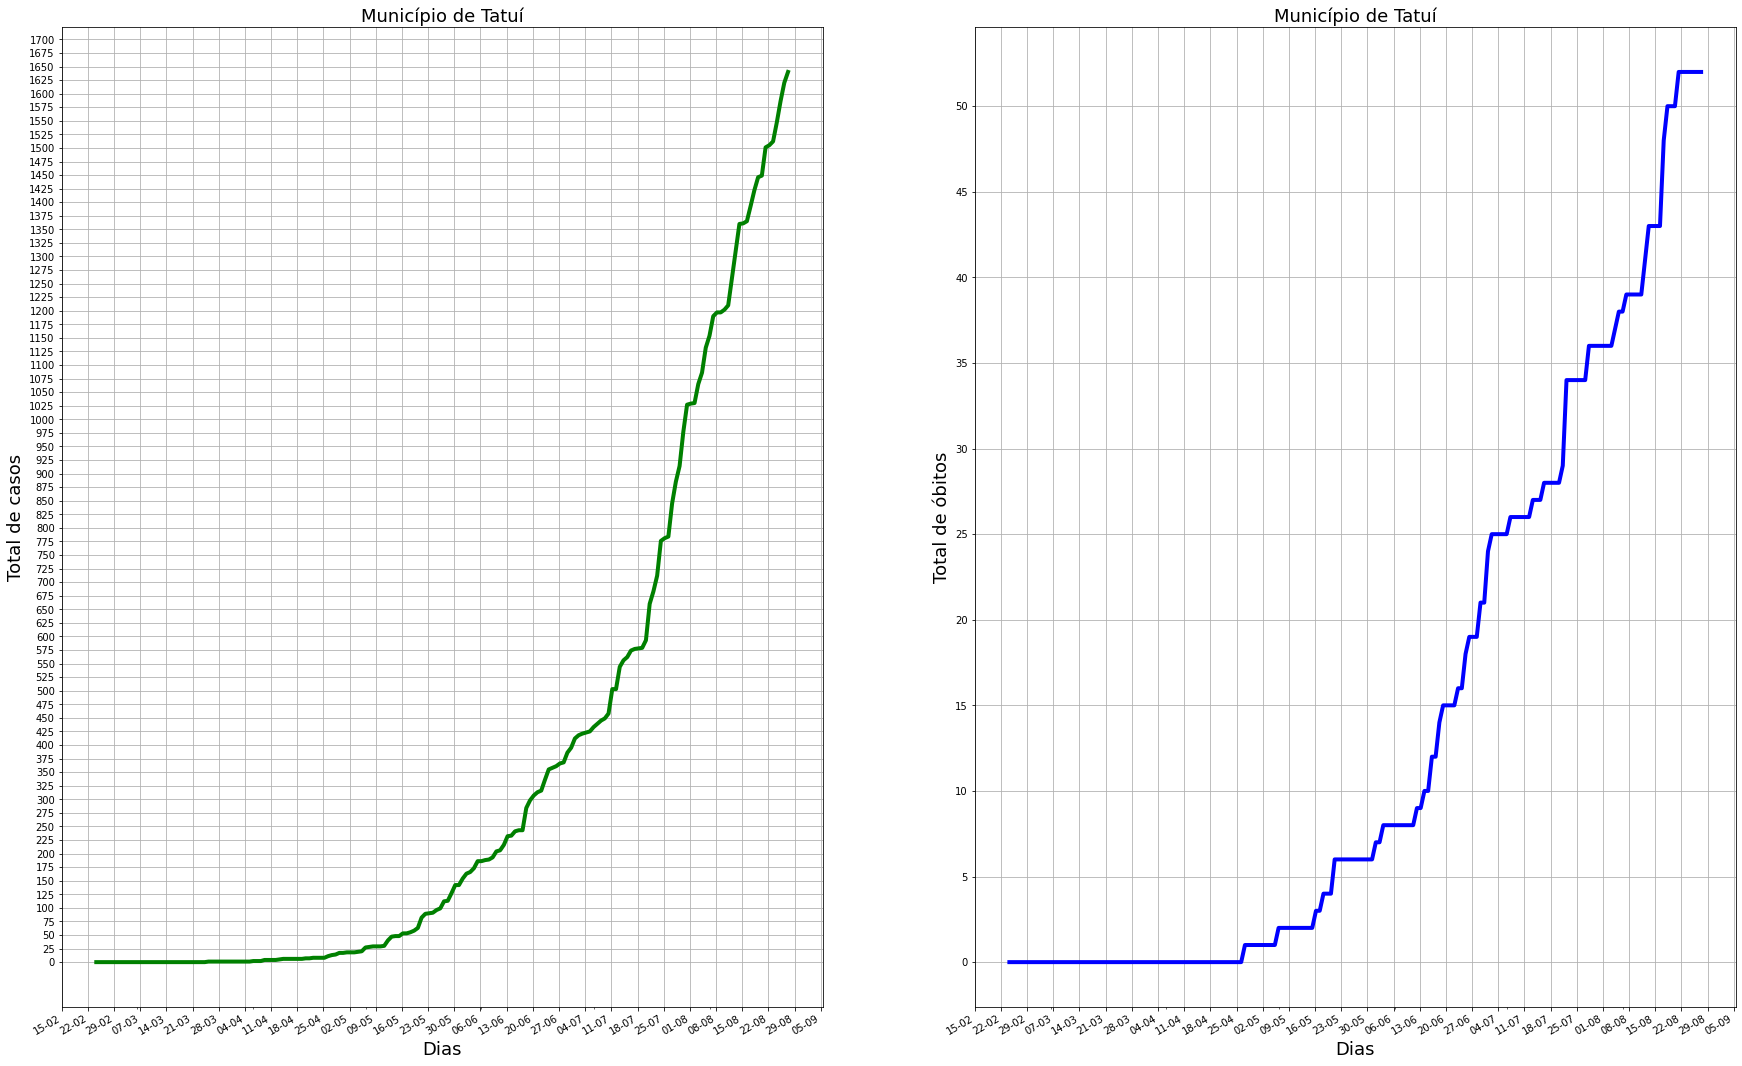

In [11]:
# Preparando tratamento do tempo:
months = mdates.MonthLocator(bymonth=1)  # every month
months_fmt = mdates.DateFormatter('%d-%m')
days = mdates.DayLocator(7)

datas = tatui_data['datahora'].astype('datetime64[ns]') 

# Plotando resultados:
fig1, a1 = plt.subplots(1, 2, figsize=(30,20))
#a1[0].plot(tatui_data['datahora'].values,tatui_data['casos_novos'].values,'r')
a1[0].bar(datas,tatui_data['casos_novos'].values, width = 0.9,color='g')
a1[0].plot(datas,tatui_data['pandas_SMA_casos_novos'].values,'r',linewidth=4,linestyle='dashed')
a1[0].set_xlabel('Dias', fontsize=18)
a1[0].set_ylabel('Casos novos diários', fontsize=18)
a1[0].set_title('Município de Tatuí', fontsize=18)

#a1[1].plot(tatui_data['datahora'].values,tatui_data['obitos_novos'].values,'b')
a1[1].plot(datas,tatui_data['pandas_SMA_obitos_novos'].values,'r',linewidth=4,linestyle='dashed')
a1[1].bar(datas,tatui_data['obitos_novos'].values, width = 0.9,color='b')
a1[1].set_xlabel('Dias', fontsize=18)
a1[1].set_ylabel('Óbitos novos diários', fontsize=18)
a1[1].set_title('Município de Tatuí', fontsize=18)

a1[0].xaxis.set_major_locator(months)
a1[0].xaxis.set_major_formatter(months_fmt)
a1[0].xaxis.set_minor_locator(days)
startx, endx = a1[0].get_xlim()
starty, endy = a1[0].get_ylim()
a1[0].xaxis.set_ticks(np.arange(startx, endx,7))
a1[0].yaxis.set_ticks(np.arange(starty, endy,5))

a1[1].xaxis.set_major_locator(months)
a1[1].xaxis.set_major_formatter(months_fmt)
a1[1].xaxis.set_minor_locator(days)
startx, endx = a1[0].get_xlim()
starty, endy = a1[0].get_ylim()
a1[1].xaxis.set_ticks(np.arange(startx, endx,7))
a1[1].yaxis.set_ticks(np.arange(0, 7,1))

a1[0].format_xdata = mdates.DateFormatter('%d-%m')
a1[1].format_xdata = mdates.DateFormatter('%d-%m')

fig1.autofmt_xdate()

fig2, a2 = plt.subplots(1, 2, figsize=(30,20))
a2[0].plot(datas,tatui_data['casos'].values,'g',linewidth=4)
a2[0].set_xlabel('Dias', fontsize=18)
a2[0].set_ylabel('Total de casos', fontsize=18)
a2[0].set_title('Município de Tatuí', fontsize=18)

a2[1].plot(datas,tatui_data['obitos'].values,'b',linewidth=4)
a2[1].set_xlabel('Dias', fontsize=18)
a2[1].set_ylabel('Total de óbitos', fontsize=18)
a2[1].set_title('Município de Tatuí', fontsize=18)

a2[0].xaxis.set_major_locator(months)
a2[0].xaxis.set_major_formatter(months_fmt)
a2[0].xaxis.set_minor_locator(days)
startx, endx = a2[0].get_xlim()
starty, endy = a2[0].get_ylim()
a2[0].xaxis.set_ticks(np.arange(startx, endx,7))
a2[0].yaxis.set_ticks(np.arange(0, endy,25))

a2[1].xaxis.set_major_locator(months)
a2[1].xaxis.set_major_formatter(months_fmt)
a2[1].xaxis.set_minor_locator(days)
startx, endx = a2[1].get_xlim()
starty, endy = a2[1].get_ylim()
a2[1].xaxis.set_ticks(np.arange(startx, endx,7))
a2[1].yaxis.set_ticks(np.arange(0, endy,5))

a2[0].format_xdata = mdates.DateFormatter('%d-%m')
a2[1].format_xdata = mdates.DateFormatter('%d-%m')
a1[0].grid()
a1[1].grid()
a2[0].grid()
a2[1].grid()
fig2.autofmt_xdate()

fig1.savefig('numeros_diarios.png')
fig2.savefig('numeros_acumulados.png')